## Monte Carlo - Euler Discretization - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Load the data for Microsoft (‘MSFT’) for the period ‘2000-1-1’ until today.

In [2]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
data = pd.read_csv('MSFT_2000.csv', index_col = 'Date')

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [4]:
log_returns = np.log(data.pct_change() + 1)
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.306691
dtype: float64

Set the risk free rate, r, equal to 2.5% (0.025).

In [5]:
r = 0.025

To transform the object into an array, reassign stdev.values to stdev.

In [6]:
stdev = stdev.values
type(stdev)

numpy.ndarray

Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [7]:
T = 1 
t_intervals = 250
iterations = 10000
delta_t = T/t_intervals

Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [9]:
Z = np.random.standard_normal((t_intervals + 1 , iterations))
Z

array([[ 0.1973035 , -1.88690768,  0.37290845, ..., -0.37447359,
        -1.74592808, -0.78574062],
       [ 0.13042199, -0.26802602,  0.94384077, ..., -1.52719584,
         1.05064993, -1.71656016],
       [-0.41457426, -0.12844791, -0.75896289, ..., -0.66573849,
         1.28209674, -0.80634784],
       ...,
       [-1.55751987, -0.9988684 ,  0.46348718, ...,  0.22204679,
         0.71217607,  0.1182085 ],
       [-0.10894715,  1.03922696, -1.44716769, ...,  0.51725655,
        -0.12622944,  1.55027713],
       [ 0.21439138,  0.4849749 , -1.2375218 , ..., -1.13409986,
        -0.17340237, -0.91452241]], shape=(251, 10000))

Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [10]:
S = np.zeros_like(Z)
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(251, 10000))

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [11]:
S0 = data.iloc[-1]
S0

MSFT    77.610001
Name: 2017-10-18, dtype: float64

In [12]:
S[0] = S0

Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.

$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^{0.5} \cdot Z_t)
$$

In [15]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


In [16]:
S

array([[ 77.610001  ,  77.610001  ,  77.610001  , ...,  77.610001  ,
         77.610001  ,  77.610001  ],
       [ 77.79972929,  77.20076188,  79.03696801, ...,  75.33805841,
         79.20088326,  75.0618443 ],
       [ 77.16981703,  77.00187144,  77.8750878 , ...,  74.36490327,
         81.18803931,  73.89045504],
       ...,
       [121.52967924,  83.21486445,  63.75277393, ...,  48.78299253,
         45.30837381,  93.82729639],
       [121.2624445 ,  84.90182381,  61.98262605, ...,  49.27056058,
         45.19359165,  96.68305495],
       [121.75703625,  85.6967095 ,  60.50717846, ...,  48.19429729,
         45.03787153,  94.97476317]], shape=(251, 10000))

Plot the first 10 of the 10,000 generated iterations on a graph.

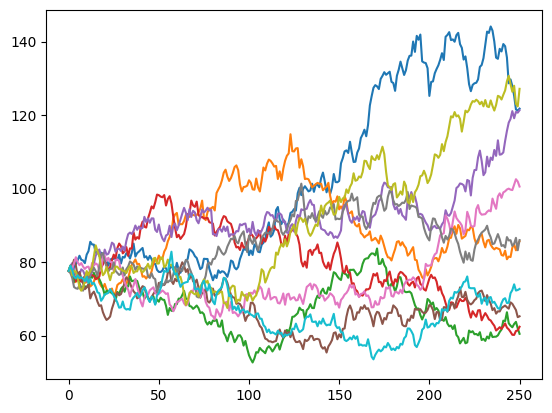

In [19]:
plt.Figure(figsize=(9,6))
plt.plot(S[:,:10])
plt.show()